# Table of Contents

* [Import Packages](#Packages)
* [Right Cortex Segmentation All Brains](#right_cortex)

<a class="anchor" id="Packages"></a>

In [1]:
import scipy
# numpy
import numpy
# matplotlib
import matplotlib
# pandas
import pandas
# scikit-learn
import sklearn
from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
import pandas as pd
import seaborn as sns
import numpy as np
# Load libraries
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from numpy import loadtxt
#from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from itertools import cycle
from sklearn.impute import SimpleImputer
from numpy import mean
from numpy import std
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import statsmodels.api as sm
import random
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import ttest_ind
import matplotlib.colors as mcolors


# clustering packages 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import normalize
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Packages for importing data
import glob
import time

# Packages needed for defining which file should be added to which dictionary using regex
import re

# Package needed for labeling points in graph
from adjustText import adjust_text

# Packages for image segmentation 
%matplotlib ipympl
import ipywidgets as widgets
import urllib
import matplotlib.cbook as cbook
from mpl_interactions import image_segmenter
import PIL

<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

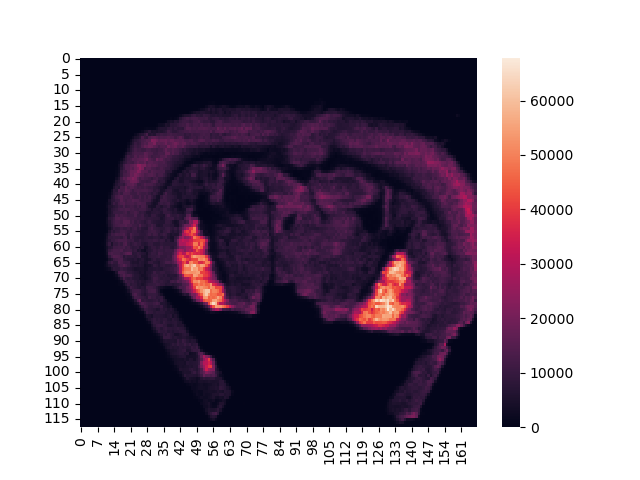

In [2]:
num_metabolites_negative = 10362
# Import metabolomics matrix only
metabolomics_matrix_226_a1tg = pd.read_csv('D:/NEW All AGE Negative TL/AL080421_226_a1tg_neg on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_226_a1tg = metabolomics_matrix_226_a1tg.drop(0)
# Reset index to start with 0
metabolomics_matrix_226_a1tg = metabolomics_matrix_226_a1tg.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_226_a1tg = pd.read_csv('D:/NEW All AGE Negative TL/AL080421_226_a1tg_neg on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_226_a1tg = np.array(metabolomics_matrix_226_a1tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_226_a1tg[coordinates_matrix_226_a1tg['x_coord'] == coordinates_matrix_226_a1tg.iloc[0][0]]), len(coordinates_matrix_226_a1tg[coordinates_matrix_226_a1tg['y_coord'] == coordinates_matrix_226_a1tg.iloc[0][1]])])[metabolomics_matrix_226_a1tg.columns.get_loc('327.2329')]
ax = sns.heatmap(uniform_data_226_a1tg)
plt.show()

<a class="anchor" id="right_cortex"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

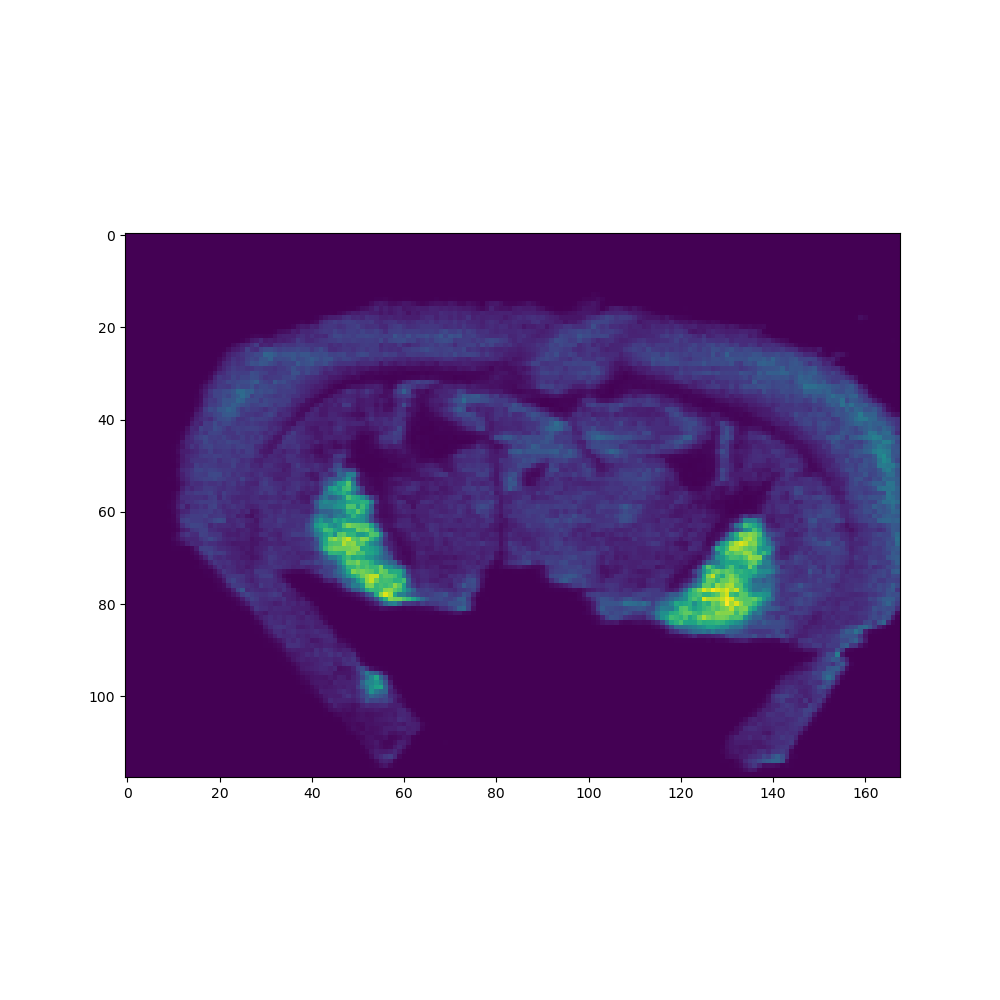

In [3]:
classes = ['Right Cortex']

# Define number of rois (here just 1 since we want the Right Cortex)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_226_a1tg_right_cortex.current_class = class_selector.value
    segmenter_226_a1tg_right_cortex.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_226_a1tg_right_cortex = image_segmenter(uniform_data_226_a1tg, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_226_a1tg_right_cortex)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [4]:
# Make variable for mask
mask_226_a1tg_right_cortex = segmenter_226_a1tg_right_cortex.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_226_a1tg_right_cortex = pd.DataFrame(mask_226_a1tg_right_cortex.reshape(len(coordinates_matrix_226_a1tg)))
print('Number of pixels in mask:', len(coordinates_roi_226_a1tg_right_cortex[coordinates_roi_226_a1tg_right_cortex[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex = metabolomics_matrix_226_a1tg.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex['roi'] = coordinates_roi_226_a1tg_right_cortex
# Specify the pixels are from the background
metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex.loc[metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex = metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex.to_csv('D:/NEW All AGE Negative masks and roi sums/Right Cortex/226_a1tg_pixel_matrix_with_mask_right_cortex.csv')
# Find total number of pixels
metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex_pixel_count = len(metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex[metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex_tic_normalized_pixel = metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex_tic_normalized_pixel = metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex_tic_normalized_pixel.to_csv('D:/NEW All AGE Negative masks and roi sums/Right Cortex/226_a1tg_sum_of_ions_within_right_cortex.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex_tic_normalized_pixel/metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_226_a1tg_right_cortex = sums_of_ion_intensities_metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_226_a1tg_right_cortex = sums_of_ion_intensities_metabolomics_matrix_226_a1tg_for_pixel_identities_right_cortex_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_226_a1tg_right_cortex*100
sums_of_ion_intensities_roi_percentage_normalized_226_a1tg_right_cortex.to_csv('D:/NEW All AGE Negative masks and roi sums/Right Cortex/226_a1tg_percentage_of_ions_within_right_cortex.csv')

Number of pixels in mask: 974


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

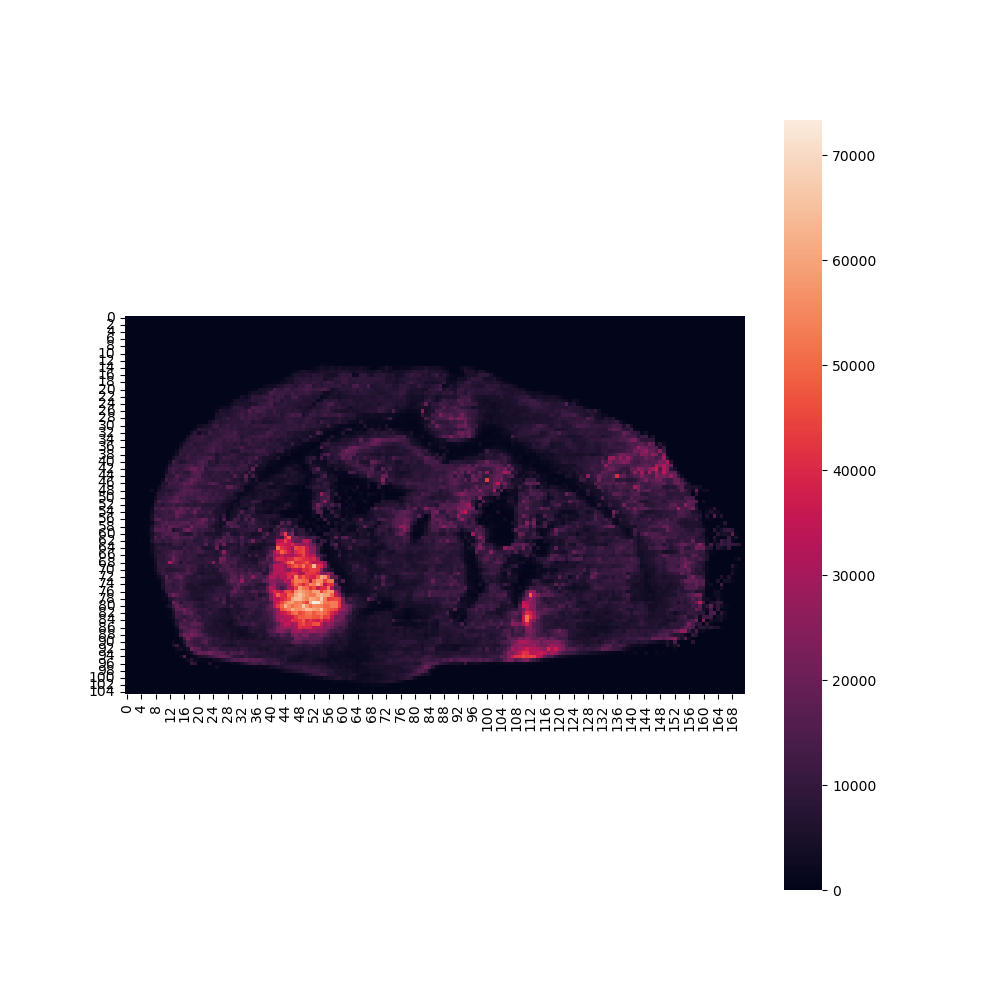

In [5]:
num_metabolites_negative = 10362
# Import metabolomics matrix only
metabolomics_matrix_225_a2tg = pd.read_csv('D:/NEW All AGE Negative TL/AL080521_225_a2tg_neg on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_225_a2tg = metabolomics_matrix_225_a2tg.drop(0)
# Reset index to start with 0
metabolomics_matrix_225_a2tg = metabolomics_matrix_225_a2tg.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_225_a2tg = pd.read_csv('D:/NEW All AGE Negative TL/AL080521_225_a2tg_neg on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_225_a2tg = np.array(metabolomics_matrix_225_a2tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a2tg[coordinates_matrix_225_a2tg['x_coord'] == coordinates_matrix_225_a2tg.iloc[0][0]]), len(coordinates_matrix_225_a2tg[coordinates_matrix_225_a2tg['y_coord'] == coordinates_matrix_225_a2tg.iloc[0][1]])])[metabolomics_matrix_225_a2tg.columns.get_loc('327.2329')]
ax = sns.heatmap(uniform_data_225_a2tg)
plt.show()

<a class="anchor" id="right_cortex"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

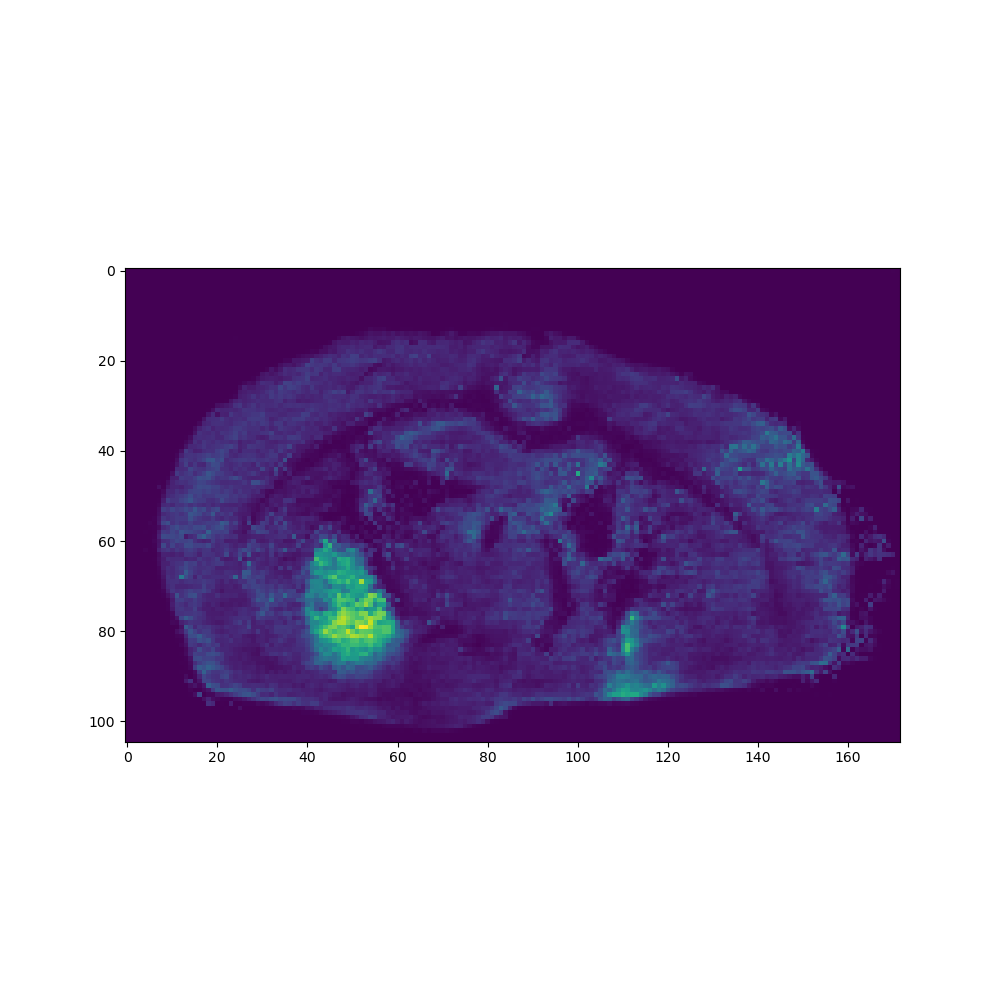

In [6]:
classes = ['Right Cortex']

# Define number of rois (here just 1 since we want the Right Cortex)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_225_a2tg_right_cortex.current_class = class_selector.value
    segmenter_225_a2tg_right_cortex.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_225_a2tg_right_cortex = image_segmenter(uniform_data_225_a2tg, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_225_a2tg_right_cortex)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [7]:
# Make variable for mask
mask_225_a2tg_right_cortex = segmenter_225_a2tg_right_cortex.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_225_a2tg_right_cortex = pd.DataFrame(mask_225_a2tg_right_cortex.reshape(len(coordinates_matrix_225_a2tg)))
print('Number of pixels in mask:', len(coordinates_roi_225_a2tg_right_cortex[coordinates_roi_225_a2tg_right_cortex[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex = metabolomics_matrix_225_a2tg.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex['roi'] = coordinates_roi_225_a2tg_right_cortex
# Specify the pixels are from the background
metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex.loc[metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex = metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex.to_csv('D:/NEW All AGE Negative masks and roi sums/Right Cortex/225_a2tg_pixel_matrix_with_mask_right_cortex.csv')
# Find total number of pixels
metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex_pixel_count = len(metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex[metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex_tic_normalized_pixel = metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex_tic_normalized_pixel = metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex_tic_normalized_pixel.to_csv('D:/NEW All AGE Negative masks and roi sums/Right Cortex/225_a2tg_sum_of_ions_within_right_cortex.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex_tic_normalized_pixel/metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_225_a2tg_right_cortex = sums_of_ion_intensities_metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_225_a2tg_right_cortex = sums_of_ion_intensities_metabolomics_matrix_225_a2tg_for_pixel_identities_right_cortex_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_225_a2tg_right_cortex*100
sums_of_ion_intensities_roi_percentage_normalized_225_a2tg_right_cortex.to_csv('D:/NEW All AGE Negative masks and roi sums/Right Cortex/225_a2tg_percentage_of_ions_within_right_cortex.csv')

Number of pixels in mask: 1133


<a class="anchor" id="Brain"></a>

Below we import a brain and show one ion that lights up the brain very well - 303.2328

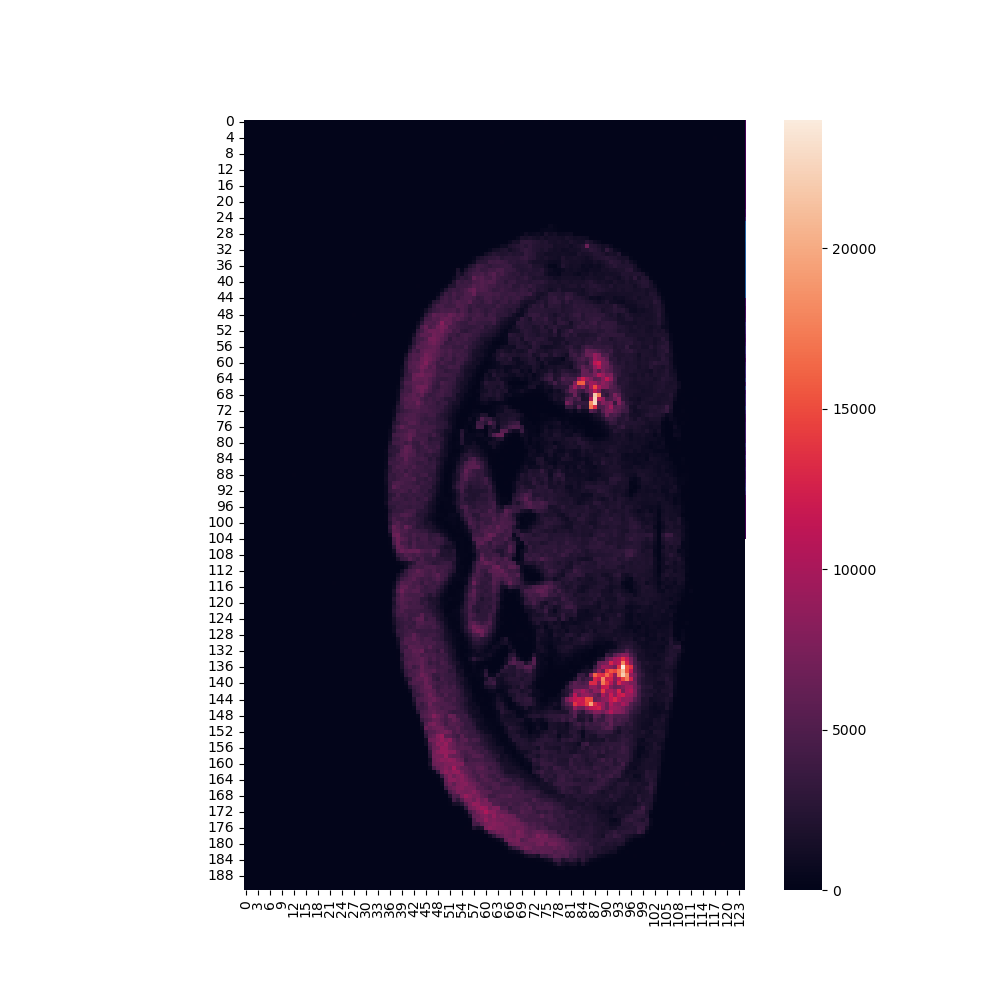

In [8]:
num_metabolites_negative = 10362
# Import metabolomics matrix only
metabolomics_matrix_270_5_Tg_s4 = pd.read_csv('D:/NEW All AGE Negative TL/AL011223_AGE_270_5_Tg_s4_neg on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(3, num_metabolites_negative+3)], header = 2)
# Drop retention time
metabolomics_matrix_270_5_Tg_s4 = metabolomics_matrix_270_5_Tg_s4.drop(0)
# Reset index to start with 0
metabolomics_matrix_270_5_Tg_s4 = metabolomics_matrix_270_5_Tg_s4.reset_index(drop = True)
# Read in coordinates for metabolomics matrix
coordinates_matrix_270_5_Tg_s4 = pd.read_csv('D:/NEW All AGE Negative TL/AL011223_AGE_270_5_Tg_s4_neg on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])
# Below we plot the ion 303.2328 (the second ion in the list)
uniform_data_270_5_Tg_s4 = np.array(metabolomics_matrix_270_5_Tg_s4).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_5_Tg_s4[coordinates_matrix_270_5_Tg_s4['x_coord'] == coordinates_matrix_270_5_Tg_s4.iloc[0][0]]), len(coordinates_matrix_270_5_Tg_s4[coordinates_matrix_270_5_Tg_s4['y_coord'] == coordinates_matrix_270_5_Tg_s4.iloc[0][1]])])[metabolomics_matrix_270_5_Tg_s4.columns.get_loc('327.2329')]
ax = sns.heatmap(uniform_data_270_5_Tg_s4)
plt.show()

<a class="anchor" id="right_cortex"></a>
Below we use the segmentation tool from the mpl_interactions package. This allows us to easily trace a region of interest of an image and even spits out the coordinates for the mask we want to use!

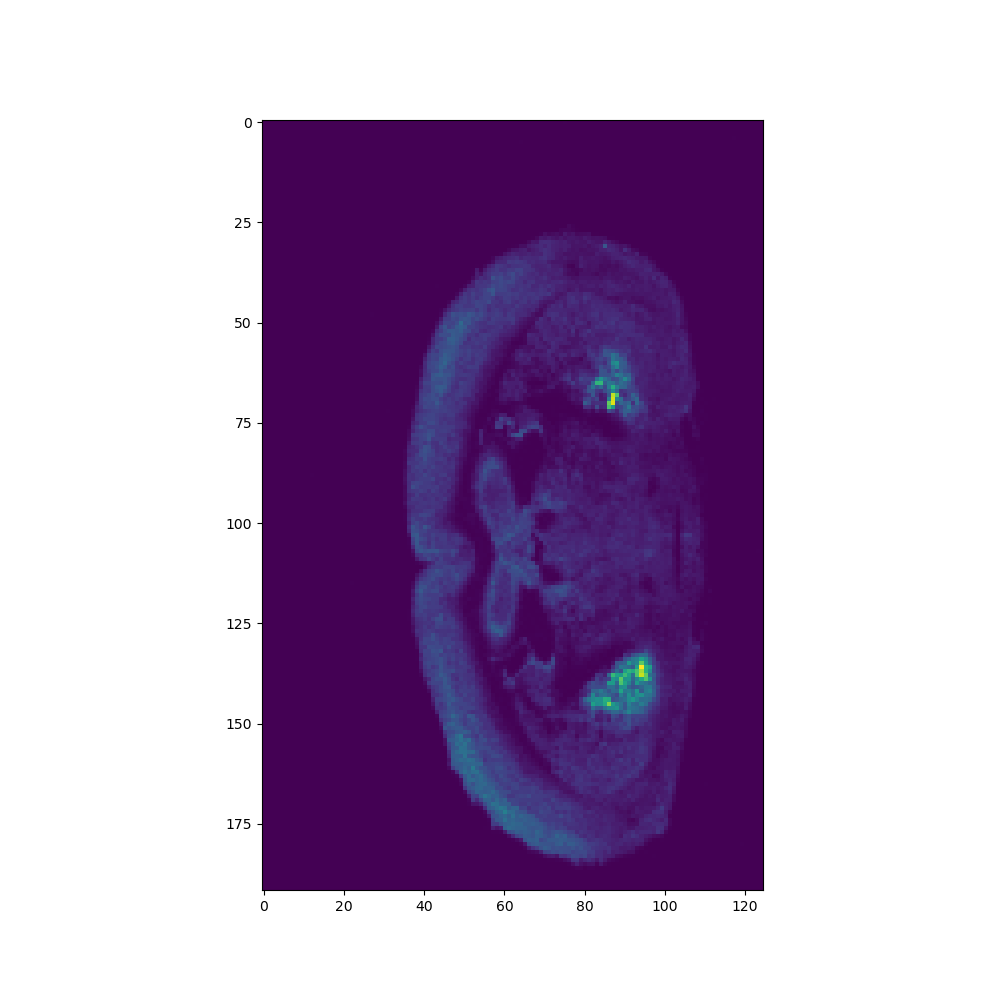

In [10]:
classes = ['Right Cortex']

# Define number of rois (here just 1 since we want the Right Cortex)
N_classes = 1
class_selector = widgets.Dropdown(options=classes, description="class")


def update(change):
    segmenter_270_5_Tg_s4_right_cortex.current_class = class_selector.value
    segmenter_270_5_Tg_s4_right_cortex.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
# Define number of classes (rois) as N_classes set above
segmenter_270_5_Tg_s4_right_cortex = image_segmenter(uniform_data_270_5_Tg_s4, nclasses = N_classes, mask_alpha=0.76)
display(widgets.HBox([erasing_button, class_selector]))
display(segmenter_270_5_Tg_s4_right_cortex)

Below we set all background pixels to zero, and calculate the percentages of all ions within the brain and save these results.

In [11]:
# Make variable for mask
mask_270_5_Tg_s4_right_cortex = segmenter_270_5_Tg_s4_right_cortex.mask
# Create mask for pixels to tell where brain matter is
coordinates_roi_270_5_Tg_s4_right_cortex = pd.DataFrame(mask_270_5_Tg_s4_right_cortex.reshape(len(coordinates_matrix_270_5_Tg_s4)))
print('Number of pixels in mask:', len(coordinates_roi_270_5_Tg_s4_right_cortex[coordinates_roi_270_5_Tg_s4_right_cortex[0] == 1]))

# Make copy of metabolomics matrix to use as identifier of pixels for brain matter
metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex = metabolomics_matrix_270_5_Tg_s4.copy()
# Add segmentation labels to metabolomics matrix
metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex['roi'] = coordinates_roi_270_5_Tg_s4_right_cortex
# Specify the pixels are from the background
metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex.loc[metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex.roi == 0, :] = 0
# Drop identity column
metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex = metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex.drop(columns = 'roi')
# Save dataframe results
metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex.to_csv('D:/NEW All AGE Negative masks and roi sums/Right Cortex/270_5_Tg_s4_pixel_matrix_with_mask_right_cortex.csv')
# Find total number of pixels
metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex_pixel_count = len(metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex[metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex.sum(axis = 1) != 0])

# Find total ion current for pixel spectra
sum_by_pixel = metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex.sum(axis=1)
# Divide pixel values by pixel sum for all pixels
metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex_tic_normalized_pixel = metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex.divide(sum_by_pixel, axis=0)
# Sum values for ions
sums_of_ion_intensities_metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex_tic_normalized_pixel = metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex_tic_normalized_pixel.sum(axis = 0)
sums_of_ion_intensities_metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex_tic_normalized_pixel.to_csv('D:/NEW All AGE Negative masks and roi sums/Right Cortex/270_5_Tg_s4_sum_of_ions_within_right_cortex.csv')
# Divide by brain size to get normalized ion sums
sums_of_ion_intensities_metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex_tic_normalized_pixel_normalized_brain = sums_of_ion_intensities_metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex_tic_normalized_pixel/metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex_pixel_count
# Take sum of all values to get total ion count
total_sum_roi_normalized_270_5_Tg_s4_right_cortex = sums_of_ion_intensities_metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex_tic_normalized_pixel_normalized_brain.sum()
# Divide by total ion count and multiply by 100 to get final percentage
sums_of_ion_intensities_roi_percentage_normalized_270_5_Tg_s4_right_cortex = sums_of_ion_intensities_metabolomics_matrix_270_5_Tg_s4_for_pixel_identities_right_cortex_tic_normalized_pixel_normalized_brain/total_sum_roi_normalized_270_5_Tg_s4_right_cortex*100
sums_of_ion_intensities_roi_percentage_normalized_270_5_Tg_s4_right_cortex.to_csv('D:/NEW All AGE Negative masks and roi sums/Right Cortex/270_5_Tg_s4_percentage_of_ions_within_right_cortex.csv')

Number of pixels in mask: 1101
